<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/Stationar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/air_passengers.csv' , index_col='Month' , parse_dates=True)
df.tail()

Mounted at /content/drive


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
df.isna().sum()

,0
Passengers,0


In [4]:
df.index.freq='MS'

In [6]:
adfuller(df['Passengers'])

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [11]:
def adf(x):
  from statsmodels.tsa.stattools import adfuller
import numpy as np

def adf(x):
    res = adfuller(x)
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")







In [10]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060498
P-Value: 0.991880243437641
Non-Stationary


In [8]:
adf(np.random.randn(100))  # داده تصادفی با توزیع نرمال

Test-Statistic: -10.15283292712517
P-Value: 7.86863336926922e-18
Stationary


In [9]:
adf(np.random.gamma(1, 1, 100))  # داده تصادفی با توزیع گاما

Test-Statistic: -9.8567903393996
P-Value: 4.3380458937791635e-17
Stationary


In [13]:
df['LogPassengers']=np.log(df['Passengers'])

In [14]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069683
P-Value: 0.4223667747703874
Non-Stationary


In [16]:
df['Diff']=df['Passengers'].diff()

<Axes: xlabel='Month'>

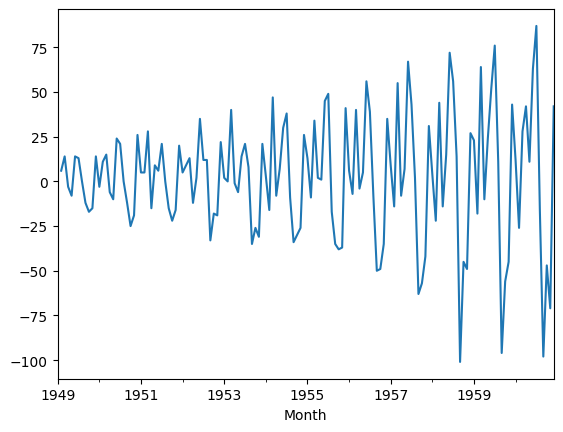

In [17]:
df['Diff'].plot()

In [20]:
adf(df['Diff'].dropna())

Test-Statistic: -2.8292668241700047
P-Value: 0.05421329028382478
Non-Stationary


In [22]:
df['LogDiff']=df['LogPassengers'].diff()

<Axes: xlabel='Month'>

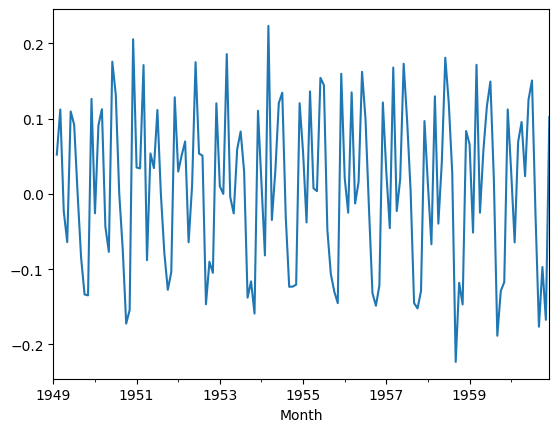

In [23]:
df['LogDiff'].plot()

In [24]:
adf(df['LogDiff'].dropna())

Test-Statistic: -2.717130598388114
P-Value: 0.07112054815086184
Non-Stationary


In [27]:
stocks = pd.read_csv('/content/drive/MyDrive/sp500sub.csv' , index_col='Date' , parse_dates=True)
stocks.tail()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2014-05-27,99.699997,99.870003,98.970001,99.059998,83.086136,638600.0,SRE
2014-05-28,99.129997,99.769997,99.070000,99.709999,83.631302,723200.0,SRE
2014-05-29,99.620003,100.129997,99.239998,100.050003,83.916489,960500.0,SRE
2014-05-30,99.860001,100.690002,99.860001,100.349998,84.168106,1175800.0,SRE
2014-06-02,100.099998,100.739998,99.900002,10.000000,NaN,NaN,NaN


In [35]:
print(stocks['Name'].unique())

['INCY' 'GILD' 'DXC' 'AFL' 'XYL' 'ARE' 'AMD' 'WYNN' 'IBM' 'ATVI' 'AES'
 'GPC' 'PRU' 'HST' 'WMB' 'GOOG' 'SRE' nan]


In [36]:
goog=stocks[stocks['Name']=='GOOG'][['Close']]

In [37]:
goog['LogPrice']=np.log(goog['Close'])

In [38]:
goog['LogRet']=goog['LogPrice'].diff()

In [39]:
print(goog.shape)
print(goog.head())


(2263, 3)
                 Close  LogPrice    LogRet
Date                                      
2010-01-04  312.204773  5.743659       NaN
2010-01-05  310.829926  5.739246 -0.004413
2010-01-06  302.994293  5.713714 -0.025532
2010-01-07  295.940735  5.690159 -0.023555
2010-01-08  299.885956  5.703402  0.013243


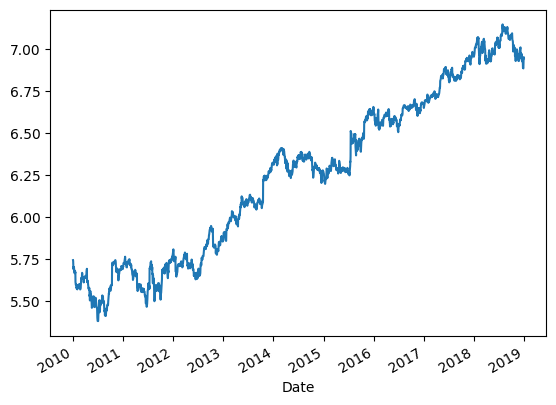

In [40]:
goog['LogPrice'].plot();


<Axes: xlabel='Date'>

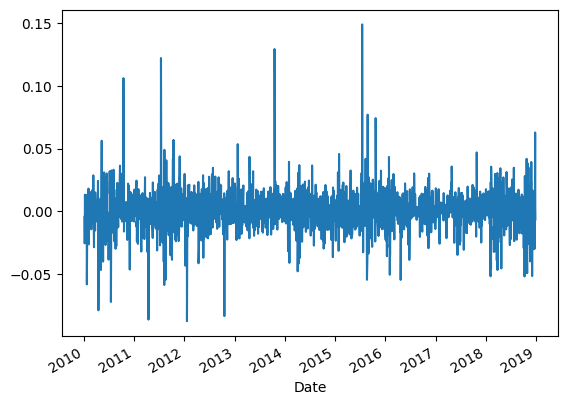

In [41]:
goog['LogRet'].plot()

In [42]:
adf(goog['LogPrice'])

Test-Statistic: -0.41819025789061465
P-Value: 0.9070170677498406
Non-Stationary


In [43]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773676
P-Value: 0.0
Stationary


In [44]:
Sre=stocks[stocks['Name']=='SRE'][['Close']]

In [46]:
Sre['LogPrice']=np.log(Sre['Close'])
Sre['LogRet']=Sre['LogPrice'].diff()

<Axes: xlabel='Date'>

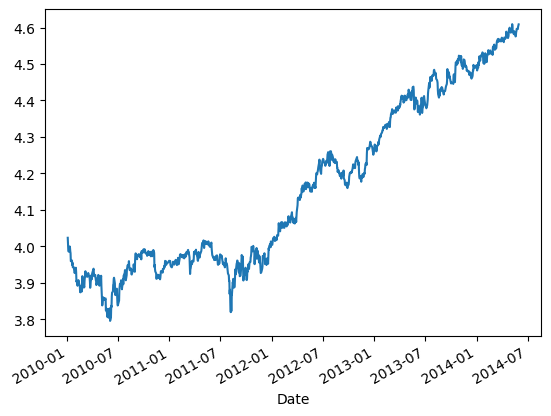

In [47]:
Sre['LogPrice'].plot()

<Axes: xlabel='Date'>

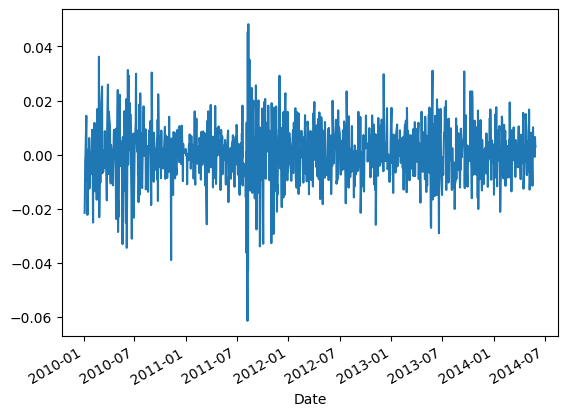

In [48]:
Sre['LogRet'].plot()

In [49]:
adf(Sre['LogPrice'])

Test-Statistic: 0.7598018564655092
P-Value: 0.9909587890027914
Non-Stationary


In [51]:
adf(Sre['LogRet'].dropna())

Test-Statistic: -17.057252768550892
P-Value: 7.992650753487933e-30
Stationary
